# Introduction to Convolutional Neural Networks and Computer Vision with TensorFlow

Computer vision is the practice of writing alorithhms which can discover patterns in visual data. Such as the camera of self-driving car recognizing the car in front.

## Get the data

The images we're working with are from the Food101 dataset (101 different classes of food): https://www.kaggle.com/datasets/dansbecker/food-101

However we're modified it to only use two classes (pizza & steak) using the image data modification notebook:https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

**Note:** We start with a smaller dataset so we can experiment quickly and figure what works (orbetter yet what doesn't work) before scaling up.

In [1]:
import zipfile
# !wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
# zip_ref = zipfile.ZipFile("pizza_stake.zip")
# zip_ref.extractall()
# zip_ref.close()

## Inspect the data (become one with it)

A very crucial step at the beginning of any machine learning project is become one with the data.

And for a computer vision project ... this usually means visualizing many samples of your data.

In [2]:
!ls pizza_steak

test
train


In [3]:
! ls pizza_steak/train/

pizza
steak


In [4]:
!ls pizza_steak/train/steak/

1000205.jpg
100135.jpg
101312.jpg
1021458.jpg
1032846.jpg
10380.jpg
1049459.jpg
1053665.jpg
1068516.jpg
1068975.jpg
1081258.jpg
1090122.jpg
1093966.jpg
1098844.jpg
1100074.jpg
1105280.jpg
1117936.jpg
1126126.jpg
114601.jpg
1147047.jpg
1147883.jpg
1155665.jpg
1163977.jpg
1190233.jpg
1208405.jpg
1209120.jpg
1212161.jpg
1213988.jpg
1219039.jpg
1225762.jpg
1230968.jpg
1236155.jpg
1241193.jpg
1248337.jpg
1257104.jpg
126345.jpg
1264050.jpg
1264154.jpg
1264858.jpg
127029.jpg
1289900.jpg
1290362.jpg
1295457.jpg
1312841.jpg
1313316.jpg
1324791.jpg
1327567.jpg
1327667.jpg
1333055.jpg
1334054.jpg
1335556.jpg
1337814.jpg
1340977.jpg
1343209.jpg
134369.jpg
1344105.jpg
134598.jpg
1346387.jpg
1348047.jpg
1351372.jpg
1362989.jpg
1367035.jpg
1371177.jpg
1375640.jpg
1382427.jpg
1392718.jpg
1395906.jpg
1400760.jpg
1403005.jpg
1404770.jpg
140832.jpg
141056.jpg
141135.jpg
1413972.jpg
1421393.jpg
1428947.jpg
1433912.jpg
143490.jpg
1445352.jpg
1446401.jpg
1453991.jpg
1456841.jpg
146833.jpg
1476404.jpg
148508

In [5]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

2090493.jpg
2090504.jpg
2125877.jpg
2129685.jpg
2133717.jpg
2136662.jpg
213765.jpg
2138335.jpg
2140776.jpg
214320.jpg
2146963.jpg
215222.jpg
2154126.jpg
2154779.jpg
2159975.jpg
2163079.jpg
217250.jpg
2172600.jpg
2173084.jpg
217996.jpg
2193684.jpg
220341.jpg
22080.jpg
2216146.jpg
2222018.jpg
2223787.jpg
2230959.jpg
2232310.jpg
2233395.jpg
2238681.jpg
2238802.jpg
2254705.jpg
225990.jpg
2260231.jpg
2268692.jpg
2271133.jpg
227576.jpg
2283057.jpg
2286639.jpg
2287136.jpg
2291292.jpg
229323.jpg
2300534.jpg
2300845.jpg
231296.jpg
2315295.jpg
2323132.jpg
2324994.jpg
2327701.jpg
2331076.jpg
233964.jpg
2344227.jpg
234626.jpg
234704.jpg
2357281.jpg
2361812.jpg
2365287.jpg
2374582.jpg
239025.jpg
2390628.jpg
2392910.jpg
2394465.jpg
2395127.jpg
2396291.jpg
2400975.jpg
2403776.jpg
2403907.jpg
240435.jpg
2404695.jpg
2404884.jpg
2407770.jpg
2412263.jpg
2425062.jpg
2425389.jpg
2435316.jpg
2437268.jpg
2437843.jpg
2440131.jpg
2443168.jpg
2446660.jpg
2455944.jpg
2458401.jpg
2487306.jpg
248841.jpg
2489716.jp

In [6]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visualize our images, first let's get the class names programmatically. 

In [7]:
# Get the class names programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))  # Created a list of class_names from the subdirectories
print(class_names)

['pizza' 'steak']


In [8]:
# Let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random
import tensorflow as tf

def view_random_image(target_dir, target_class):
    # Setup the target directory (we'll view images from here)
    target_folder = target_dir + target_class
    
    # Get a random image path
    random_image = random.sample(os.listdir(target_folder), 1)
    print(random_image)
    
    # Read the image and plot it using matplotlib
    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");
    
    print(f"Image shape: {img.shape}") # show the shape of the image
    
    return img

['674188.jpg']
Image shape: (512, 512, 3)


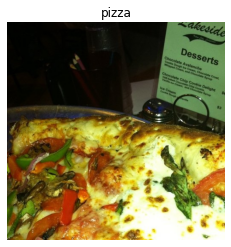

In [9]:
# View a random image from the training dataset
img = view_random_image(target_dir = "pizza_steak/train/",
                       target_class="pizza")

In [10]:
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [103, 136,  79],
        [103, 136,  79],
        [103, 136,  79]],

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [104, 137,  80],
        [104, 137,  80],
        [105, 138,  81]],

       [[  0,   2,   0],
        [  0,   2,   0],
        [  0,   2,   0],
        ...,
        [104, 139,  81],
        [105, 138,  81],
        [105, 138,  81]],

       ...,

       [[ 78,  89,  49],
        [191, 199, 158],
        [ 94,  99,  59],
        ...,
        [254, 255, 249],
        [254, 255, 249],
        [254, 255, 249]],

       [[ 36,  43,  10],
        [ 85,  90,  58],
        [ 33,  34,   2],
        ...,
        [254, 255, 250],
        [254, 255, 250],
        [254, 255, 250]],

       [[ 46,  52,  24],
        [ 83,  88,  58],
        [ 93,  92,  64],
        ...,
        [254, 255, 25

In [11]:
# View thr image shape
img.shape # returns width, height, colour channels

(512, 512, 3)

**Note:** As we're discussed before, many machine learning models, including neural networks perfer the values they work with to be between 0 and 1. Knowing this, one of the most common preprocessing steps for working with images is to **scale** (also referred to as **normalize**) their pixel values bydividing the image arrays by 255. (since is the maximum pixel value).

In [12]:
# Get all the pixel values between 0 & 1
img/255.

array([[[0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        ...,
        [0.40392157, 0.53333333, 0.30980392],
        [0.40392157, 0.53333333, 0.30980392],
        [0.40392157, 0.53333333, 0.30980392]],

       [[0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        ...,
        [0.40784314, 0.5372549 , 0.31372549],
        [0.40784314, 0.5372549 , 0.31372549],
        [0.41176471, 0.54117647, 0.31764706]],

       [[0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        [0.        , 0.00784314, 0.        ],
        ...,
        [0.40784314, 0.54509804, 0.31764706],
        [0.41176471, 0.54117647, 0.31764706],
        [0.41176471, 0.54117647, 0.31764706]],

       ...,

       [[0.30588235, 0.34901961, 0.19215686],
        [0.74901961, 0.78039216, 0.61960784],
        [0.36862745, 0

## An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find  patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [13]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 0 & 1, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale= 1./255)

# Setup paths to our data directories
train_dir = "pizza_steak/train"
test_dir =  "pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              batch_size=32,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                              batch_size=32,
                                              target_size=(224,224),
                                              class_mode="binary",
                                              seed=42)

# Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                          kernel_size=3,
                          activation="relu",
                          input_shape=(224, 224, 3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                             padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 59s 1s/step - loss: 0.6130 - accuracy: 0.6393 - val_loss: 0.4065 - val_accuracy: 0.8260
Epoch 2/5
47/47 [==============================] - 54s 1s/step - loss: 0.4286 - accuracy: 0.8113 - val_loss: 0.3430 - val_accuracy: 0.8460
Epoch 3/5
47/47 [==============================] - 56s 1s/step - loss: 0.3896 - accuracy: 0.8273 - val_loss: 0.3572 - val_accuracy: 0.8300
Epoch 4/5
47/47 [==============================] - 56s 1s/step - loss: 0.3459 - accuracy: 0.8613 - val_loss: 0.3235 - val_accuracy: 0.8580
Epoch 5/5
47/47 [==============================] - 55s 1s/step - loss: 0.2961 - accuracy: 0.8793 - val_loss: 0.3048 - val_accuracy: 0.8680


In [14]:
len(train_data)

47

**Note:** If the above cell is taking longer than ~10 seconds per epoch, make sure you're using a GPU by going to Runtime -> Change Runtime Type -> Hardware Accelator -> GPU (you may have to rerun some cells above) - for Google Colab

In [15]:
# Get the model summary
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Using the same model as before

Let's replicate the model we're built in a previous section to see if it works with our image data.

The model we're building is from the TensorFlow playground:


In [16]:
# Set the random seed
tf.random.set_seed(24)

# Create a model to replicate the TensorFlow Playground model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224, 224, 3)),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])


# Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 7s 142ms/step - loss: 0.8495 - accuracy: 0.4967 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 6s 138ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 7s 144ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 7s 151ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 7s 149ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [17]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 150528)            0         
                                                                 
 dense_1 (Dense)             (None, 4)                 602116    
                                                                 
 dense_2 (Dense)             (None, 4)                 20        
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 602,141
Trainable params: 602,141
Non-trainable params: 0
_________________________________________________________________


Despite having 20x more parameters than our CNN (model_1), model_2 performs terribly ... let's try to improve the model_2

In [18]:
# Build model 3 with 1 more hidden layers and 100 neurons

# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
               optimizer=tf.keras.optimizers.Adam(),
               metrics=["accuracy"])

# 3 Fit the model
history_3 = model_3.fit(train_data,
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=valid_data,
                       validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 12s 240ms/step - loss: 4.1924 - accuracy: 0.6013 - val_loss: 0.7066 - val_accuracy: 0.7500
Epoch 2/5
47/47 [==============================] - 11s 239ms/step - loss: 1.2505 - accuracy: 0.6907 - val_loss: 0.4906 - val_accuracy: 0.7620
Epoch 3/5
47/47 [==============================] - 11s 225ms/step - loss: 0.5975 - accuracy: 0.7347 - val_loss: 0.5031 - val_accuracy: 0.7400
Epoch 4/5
47/47 [==============================] - 11s 226ms/step - loss: 0.7170 - accuracy: 0.7193 - val_loss: 0.5728 - val_accuracy: 0.7780
Epoch 5/5
47/47 [==============================] - 11s 227ms/step - loss: 0.7344 - accuracy: 0.7087 - val_loss: 0.8106 - val_accuracy: 0.6920


In [19]:
# Get a summary of model_3
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 150528)            0         
                                                                 
 dense_4 (Dense)             (None, 100)               15052900  
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 100)               10100     
                                                                 
 dense_7 (Dense)             (None, 1)                 101       
                                                                 
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


In [20]:
15073201/31101

484.6532587376612

**Note:** You can think of trainable parameters as **patterns a model can learn from data**. Intuitvely, you might think more is better. And in lots of cases, it is. But in this case, the difference here is the two different styles of model we're using. Where a series of dense layers has a number of different learnable parameters connected to each other and hence a higher number of possible learnable patterns, **a convolutional neural netowrk seeks to sort out and learn the most important patterns in an image.** So even though these are less learnable paramters in our convolutinal neural network, there are often more helpful in dechiphering between different **features** in an image. 

In [21]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    

## Binary classification: let's break it down

1. Become one with the data (visualize, visualize, visualize)
2. Preprocess the data (prepared it for our model, the main step here was scaling/normalizing & turning our data into batches)
3. Created a model (start with a baseline) - start with a beanchmark - article for validation
4. Fit the model
5. Evalaute the model
6. Adjust different parameters and improve the model (try to beat our baseline)
7. Repeat until satisfied (experiment, experiment, experiment)

### 1. Become one with the data

['296268.jpg']
Image shape: (512, 382, 3)
['1159797.jpg']
Image shape: (512, 512, 3)


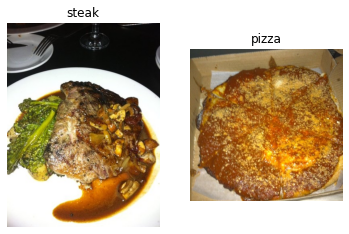

In [22]:
# Visualize data
plt.figure()
plt.subplot(1, 2, 1)
steak_img = view_random_image("pizza_steak/train/", "steak")
plt.subplot(1, 2, 2)
pizza_img = view_random_image("pizza_steak/train/", "pizza")

### 2. Preprocess the data (prepare it for a model)

In [23]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

Our next step is to turn our data into **batches**.

A batch is a small subset of data. Rather tahn look at all ~10,000 images at one time, a model might only look at 32 at a time.

It does this for a couple of reasons:
1. 10,000 images (or more) might not fit into the memory of your preocessor (CPU, GPU, TPU).
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

32 is a good fit for the batch size ... it is the optimal number.

In [24]:
# Create train and test data generators and rescale the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [25]:
# Load in our image data from directories and turn them into batchs
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224, 224),
                                              class_mode="binary",
                                              batch_size=32)
test_data = test_datagen.flow_from_directory(directory=test_dir,
                                            target_size=(224, 224),
                                            class_mode="binary",
                                            batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [26]:
# Get a sample of a train data batch
images, labels = train_data.next() # get the "next" batch of images/labels in train data
len(images), len(labels)

(32, 32)

In [27]:
# How many batches are there?
len(train_data)

47

In [28]:
1500/32

46.875

In [29]:
# Get the first two images
images[:2], images[0].shape

(array([[[[0.47058827, 0.40784317, 0.34509805],
          [0.48627454, 0.42352945, 0.36078432],
          [0.48627454, 0.43529415, 0.37254903],
          ...,
          [0.82745105, 0.7137255 , 0.48627454],
          [0.8431373 , 0.7372549 , 0.5294118 ],
          [0.87843144, 0.77647066, 0.58431375]],
 
         [[0.50980395, 0.427451  , 0.36078432],
          [0.5058824 , 0.42352945, 0.35686275],
          [0.5137255 , 0.4431373 , 0.3647059 ],
          ...,
          [0.82745105, 0.7058824 , 0.48235297],
          [0.82745105, 0.70980394, 0.49803925],
          [0.8431373 , 0.73333335, 0.5372549 ]],
 
         [[0.5254902 , 0.427451  , 0.34901962],
          [0.5372549 , 0.43921572, 0.36078432],
          [0.5372549 , 0.45098042, 0.36078432],
          ...,
          [0.82745105, 0.7019608 , 0.4784314 ],
          [0.82745105, 0.7058824 , 0.4901961 ],
          [0.8352942 , 0.7176471 , 0.5137255 ]],
 
         ...,
 
         [[0.77647066, 0.5647059 , 0.2901961 ],
          [0.77647

In [30]:
images[7]

array([[[0.30588236, 0.17254902, 0.227451  ],
        [0.34901962, 0.21960786, 0.25490198],
        [0.4039216 , 0.2784314 , 0.2901961 ],
        ...,
        [0.16470589, 0.02745098, 0.1137255 ],
        [0.16862746, 0.01960784, 0.11764707],
        [0.15686275, 0.00784314, 0.10588236]],

       [[0.28235295, 0.14901961, 0.20392159],
        [0.34117648, 0.21176472, 0.24705884],
        [0.42352945, 0.29803923, 0.30980393],
        ...,
        [0.17254902, 0.02352941, 0.1137255 ],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16078432, 0.01176471, 0.10980393]],

       [[0.26666668, 0.13333334, 0.19607845],
        [0.32941177, 0.20000002, 0.23529413],
        [0.42352945, 0.29803923, 0.31764707],
        ...,
        [0.19215688, 0.04313726, 0.13333334],
        [0.1764706 , 0.02745098, 0.11764707],
        [0.16862746, 0.03137255, 0.1254902 ]],

       ...,

       [[0.62352943, 0.5803922 , 0.5647059 ],
        [0.6039216 , 0.56078434, 0.54509807],
        [0.6039216 , 0

In [31]:
images[7].shape

(224, 224, 3)

In [32]:
# View the first batch of labels,
labels

array([1., 1., 0., 1., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 1.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing result that you setup when beginning a machine learning experiment and then as you keep experimenting, you try to beat the baseline.

**Note:** In deep learning, there is almost an infinite amount of architectures you could create. So, one of the best ways to get starteed is to start with something simple and see if it waorks on your data and then introduce complexity as required (e.g. look at which current model is performing best in the field for your problem).

In [33]:
# Make the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [34]:
# Create the model (this will be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10,
          kernel_size=3,
          strides=1,
          padding="valid",
          activation="relu",
          input_shape=(224, 224, 3)),  # input layer (specify input shape)
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid") # output layer (working with binary classification so only 1 output neuron)
])

**Practice:** Understand what's going on in a Conv2D layer by going through the CNN explainer website for 10-20 minutes: https://poloclub.github.io/cnn-explainer/

In [35]:
# Compile the model
model_4.compile(loss="binary_crossentropy",
               optimizer=Adam(),
               metrics=["accuracy"])

In [36]:
# Get the summary of our model
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 222, 222, 10)      280       
                                                                 
 conv2d_5 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 conv2d_6 (Conv2D)           (None, 218, 218, 10)      910       
                                                                 
 flatten_3 (Flatten)         (None, 475240)            0         
                                                                 
 dense_8 (Dense)             (None, 1)                 475241    
                                                                 
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


### 4. Fit the model

In [37]:
# Check the lenghts and training and test data generatos
len(train_data), len(test_data)

(47, 16)

In [38]:
# Fit the model
history_4 = model_4.fit(train_data, # this is a combination of labels and sample data
                       epochs=5,
                       steps_per_epoch=len(train_data),
                       validation_data=test_data,
                       validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 73s 2s/step - loss: 0.9505 - accuracy: 0.7060 - val_loss: 0.4237 - val_accuracy: 0.8080
Epoch 2/5
47/47 [==============================] - 65s 1s/step - loss: 0.4362 - accuracy: 0.8067 - val_loss: 0.3869 - val_accuracy: 0.8320
Epoch 3/5
47/47 [==============================] - 70s 1s/step - loss: 0.2923 - accuracy: 0.8900 - val_loss: 0.4597 - val_accuracy: 0.7840
Epoch 4/5
47/47 [==============================] - 73s 2s/step - loss: 0.1087 - accuracy: 0.9733 - val_loss: 0.4404 - val_accuracy: 0.8020
Epoch 5/5
47/47 [==============================] - 69s 1s/step - loss: 0.0303 - accuracy: 0.9973 - val_loss: 0.8671 - val_accuracy: 0.7420


In [40]:
model_1.evaluate(test_data)

16/16 [==============================] - 4s 249ms/step - loss: 0.3048 - accuracy: 0.8680


[0.30481141805648804, 0.8679999709129333]

In [41]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 10)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 53, 53, 10)       0         
 2D)                                                    